# <b> Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. 
## These are their  questions:

### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
###    Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
###    Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
###    Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

    
Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

# Importing the necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#from sodapy import Socrata

## Importing PLUTO data for Brooklyn, Bronx, Manhattan, Queens, and Staten Island

### Brooklyn PLUTO data

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


### Bronx PLUTO data

In [3]:
body = client_1e57117b9f404ba098ce646504561a71.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-ldxtiwxezyt0jo',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


df_pl_BX = pd.read_csv(body)
df_pl_BX.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


### Manhattan PLUTO data

In [4]:
body = client_1e57117b9f404ba098ce646504561a71.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-ldxtiwxezyt0jo',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pl_MN = pd.read_csv(body)
df_pl_MN.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


### Queens PLUTO data

In [ ]:
body = client_1e57117b9f404ba098ce646504561a71.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-ldxtiwxezyt0jo',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pl_QN = pd.read_csv(body)
df_pl_QN.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


### Staten Island PLUTO data

In [ ]:
body = client_1e57117b9f404ba098ce646504561a71.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-ldxtiwxezyt0jo',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pl_SI = pd.read_csv(body)
df_pl_SI.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.0,2000.0,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
1,SI,1,17,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
2,SI,1,18,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
3,SI,1,19,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
4,SI,1,21,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1


Create a socrata object to handle the API

### NYC 311 calls for Department of Housing Preservation and Development data

In [ ]:
#!wget -o NYC_HPD_data.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0702EN/datasets/311_Service_Requests_from_2010_to_Present_min.csv
body = client_1e57117b9f404ba098ce646504561a71.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-ldxtiwxezyt0jo',Key='NYC_311_Service_Requests_from_2010_to_Present_min.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_hpd = pd.read_csv(body)
df_hpd.head()
#df_hpd = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0702EN/datasets/311_Service_Requests_from_2010_to_Present_min.csv')
#df_hpd.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


<h1> <center> Data Analysis </center></h1>
    
## Let's find out what are the major complaints

In [ ]:
df_complain=df_hpd.groupby('Complaint Type')[['Unique Key']].count()
#df_complain.sort_values('Unique Key')
#df_hpd['Unique Key']
df_complain.shape

(30, 1)

### It seems like we have 30 different types of complains
We don't need all of this. We need the complaints with highest frequency

In [ ]:
df_most_complaints=df_complain[df_complain['Unique Key']>80000]
df_most_complaints=df_most_complaints.sort_values('Unique Key',ascending=False)
df_most_complaints.head()

,Unique Key
Complaint Type,
HEAT/HOT WATER,1261574
HEATING,887850
PLUMBING,711130
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,451643


In [ ]:
df_most_complaints.reset_index(inplace=True)
df_most_complaints.head()

,Complaint Type,Unique Key
0,HEAT/HOT WATER,1261574
1,HEATING,887850
2,PLUMBING,711130
3,GENERAL CONSTRUCTION,500863
4,UNSANITARY CONDITION,451643


# The Major complaint is about Heat/Hot water
    

  ### The other major complaints (frequency > 80,000)  are Heating, Plumbing, General Construction, Unsanitary Condition etc.
  
  Are these somehow related? Because hot water and plumbing is related. Is some construction work in an area causing these?
  To answer these, <b> let's look at <b>
  
 
# Let's make a dataframe with most occuring complains

In [ ]:
df_major_complaints=df_hpd[df_hpd['Complaint Type'].isin(df_most_complaints['Complaint Type'])]
df_major_complaints.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
df_major_complaints.drop(columns='Unnamed: 0')
#df_major_complaints.columns
df_major_complaints.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


## It seems like the area with ZipCode 11226 has the most complaint. It is Flatbush, Brooklyn NY.

### Another pattern is noticable is that 10467, 10458, 10453, 10468, 10457, 10452, and 10456 are very close by area and having very high number of complains. This is west Bronx area and near the Yankee Stadium.
### Are these for some common reason?

###Let's look at the top complaints zip first

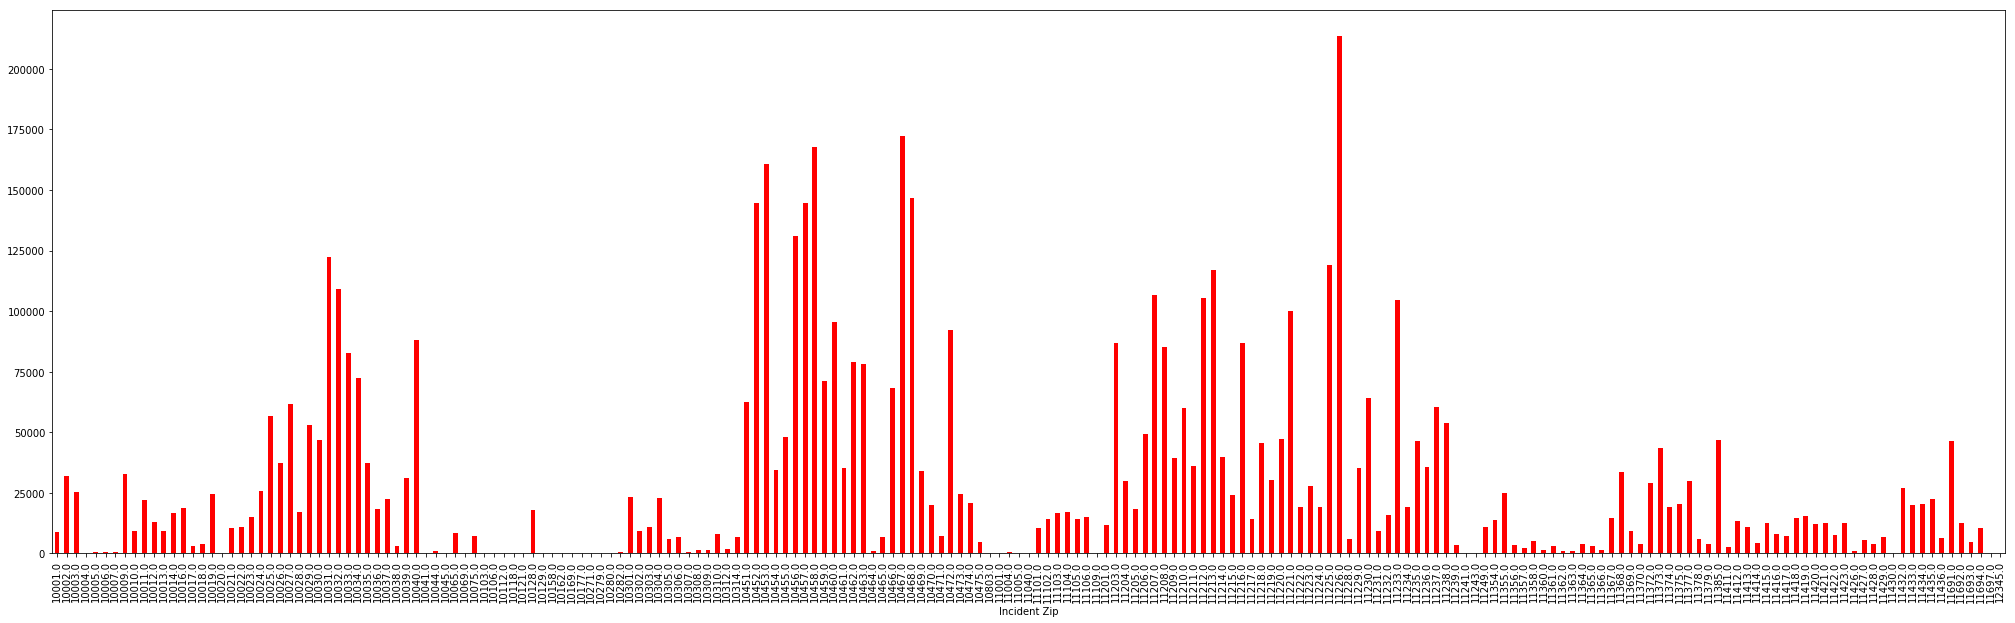

In [ ]:
df_major_complaints.groupby('Incident Zip')['Unique Key'].count().plot(kind='bar',figsize=(35,10),color='r')
plt.show()

### Let's find where the unspecified zipcodes belong based on PLUTO data

In [ ]:
df_unspecified=df_major_complaints[df_major_complaints['Borough']=='Unspecified'][['Unique Key','Incident Zip']]
df_unspecified.head(10)

,Unique Key,Incident Zip
177399,19964837,10032.0
177400,19964657,11210.0
177401,19964635,11210.0
177402,19939867,11235.0
177403,19939842,10029.0
177404,19931574,11692.0
177405,19924235,10467.0
177406,19924140,11210.0
177407,19915341,10458.0
177408,19899931,11226.0


In [ ]:
k=0
for i,j in df_unspecified[['Unique Key', 'Incident Zip']].values:
    if j in df_pl_BK['ZipCode']:
        df_hpd.loc[(df_hpd['Unique Key']==i),'Borough']='BROOKLYN'
    elif j in df_pl_BX['ZipCode']:
        df_hpd.loc[(df_hpd['Unique Key']==i),'Borough']='BRONX'
    elif j in df_pl_MN['ZipCode']:
        df_hpd.loc[(df_hpd['Unique Key']==i),'Borough']='MANHATTAN'
    elif j in df_pl_QN['ZipCode']:
        df_hpd.loc[(df_hpd['Unique Key']==i),'Borough']='QUEENS'
    elif j in df_pl_SI['ZipCode']:
        df_hpd.loc[(df_hpd['Unique Key']==i),'Borough']='STATEN ISLAND'
#print(k," values appears to be without a zip. Let's recheck the Data")       
df_hpd[df_hpd['Borough']=='Unspecified'].shape

In [ ]:
#df_major_complaints[df_major_complaints['Unique Key']==19964657]['Borough'].values
df_hpd[df_hpd['Borough']=='Unspecified']['Incident Zip'].count()

### There seems to be three patches of most troubled area with neighboring zipcodes.

In [ ]:
df_complains_freq_zip[df_complains_freq_zip['Unique Key']>48000].plot(kind='bar',figsize=(20,10))
plt.show()

In [ ]:
df_hpd.groupby('Borough')[['Unique Key']].count()

In [ ]:
df_hpd.shape